# The Parks Dataset

For this metric we will be using a dataset of parks. This dataset contains a list of pittsburgh parks, along with their acreage and location.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

parkDataset = pd.read_csv("Parks.csv")
neighborhoodDataset = pd.read_csv("Neighborhoods.csv")

## The Dataset's Weak Point

Sadly, this dataset does not directly tell us which neighborhoods the parks belong to. It does, however, tell us  
which sector of the city it belongs to. As long as we can find which neighborhoods belong to which sectors, this will let us use  
the parks dataset.

## Neighboring Sectors

A park is not solely used by those in the same sector as it, so we need to find out which sectors neighbor eachother.  
by searching for a map of neighboring sectors in Pittsburgh, you'll come across a link to the official city website.  
The PDF document linked contains this helpful map:

[![sectors.png](https://i.postimg.cc/7hTCC67M/sectors.png)](https://postimg.cc/1VsR2yvf)

The following code is the manual mapping of neighbors for each sector

In [31]:
neighbors = [[None]] * 17
neighbors[1] = [2, 3, 13]
neighbors[2] = [3, 1]
neighbors[3] = [16, 1, 2, 4]
neighbors[4] = [6, 5, 3]
neighbors[5] = [4, 6, 7]
neighbors[6] = [4, 5, 7, 16]
neighbors[7] = [8, 9, 14,15, 5, 6]
neighbors[8] = [7, 9]
neighbors[9] = [10, 14, 7, 8]
neighbors[10] = [11, 12, 14, 9]
neighbors[11] = [10, 12]
neighbors[12] = [10, 11, 13, 14]
neighbors[13] = [1, 12, 15, 16]
neighbors[14] = [15, 7, 8, 10, 12]
neighbors[15] = [13, 14, 7, 16]
neighbors[16] = [15, 13, 7, 6, 4, 3]

## Which neighborhoods go where?

Luckily, the neighborhoods dataset from WPRDC contains the exact same sector mapping as the  
parks dataset. Using this, we will put every neighborhood in its proper sector.

In [3]:
#Create a list of dictionaries for every sector
sectorNeighborhoods = [{}]
for i in range(16):
    sectorNeighborhoods.append({})

In [5]:

# Fill our list of dictionaries with the neighborhood in the corresponding sector
for index, row in neighborhoodDataset.iterrows():
    sectorNeighborhoods[int(row["sectors"])][row["hood"]] = 0


## The Metric

The parks dataset already provides an extremely useful metric: size.  
For every park, we will add its acreage to the neighborhoods in its sector.  
Furthermore, we will use the list of neighbors to give each neighbor slightly lower  
amount of acreage.

In [6]:
# Set a modifier for neighboring sectors
modifier = 4

In [35]:
# Start filling our neighborhoods using our metric
for index, row in parkDataset.iterrows():
    try:
        sector = int(row["sector"])
    except:
        # Error in the dataset, we don't know where this park is!
        None
    for neighborhood in sectorNeighborhoods[sector]:
        sectorNeighborhoods[sector][neighborhood] += row["acreage"]
    for neighbor in neighbors[sector]:
        for neighborhood in sectorNeighborhoods[neighbor]:
            sectorNeighborhoods[neighbor][neighborhood] += row["acreage"] / modifier

In [36]:
allHoods = {}

# Unsectorize the neighborhoods
for i in range(len(sectorNeighborhoods)):
    for neighborhood in sectorNeighborhoods[i]:
        allHoods[neighborhood] = sectorNeighborhoods[i][neighborhood]

## Unpacking the data

Looking at the graph below, it appears Squirrel Hill North/South, Point Breeze, Swisshelm Park, and Regent Square  
blow the other neighborhoods out of the water. This makes sense, as these neighborhoods have a pretty central position  
in the city, as well has having parks such as Schenley 

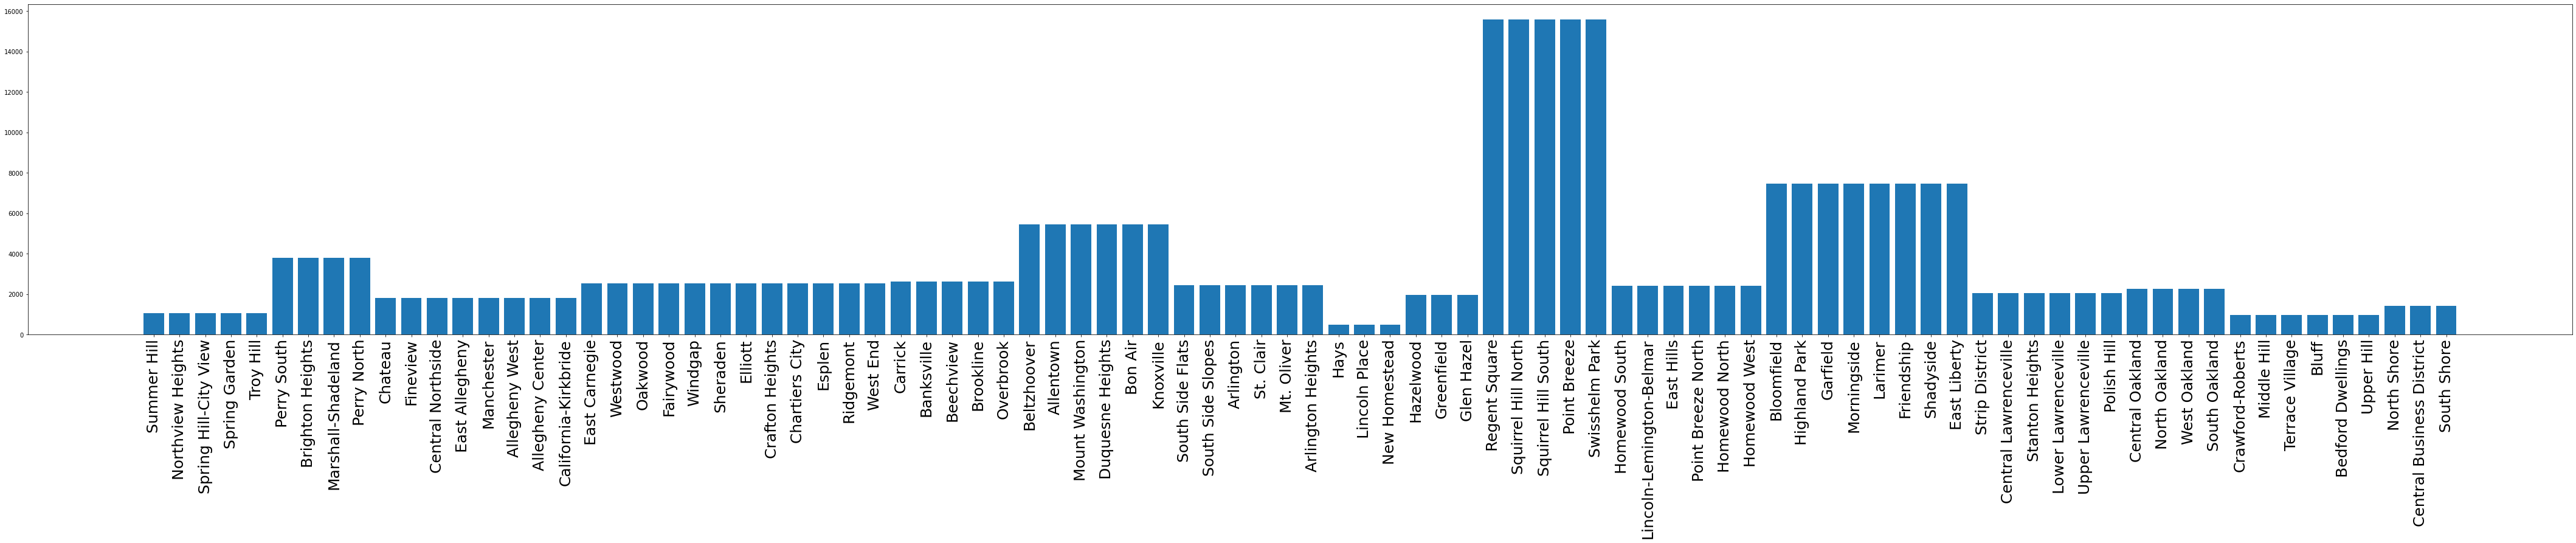

In [37]:
# Graph our Data
plt.figure(figsize = (75,10))
plt.xticks(rotation = 90)
plt.xticks(fontsize= 25)
plt.bar(allHoods.keys(), allHoods.values())
plt.show()

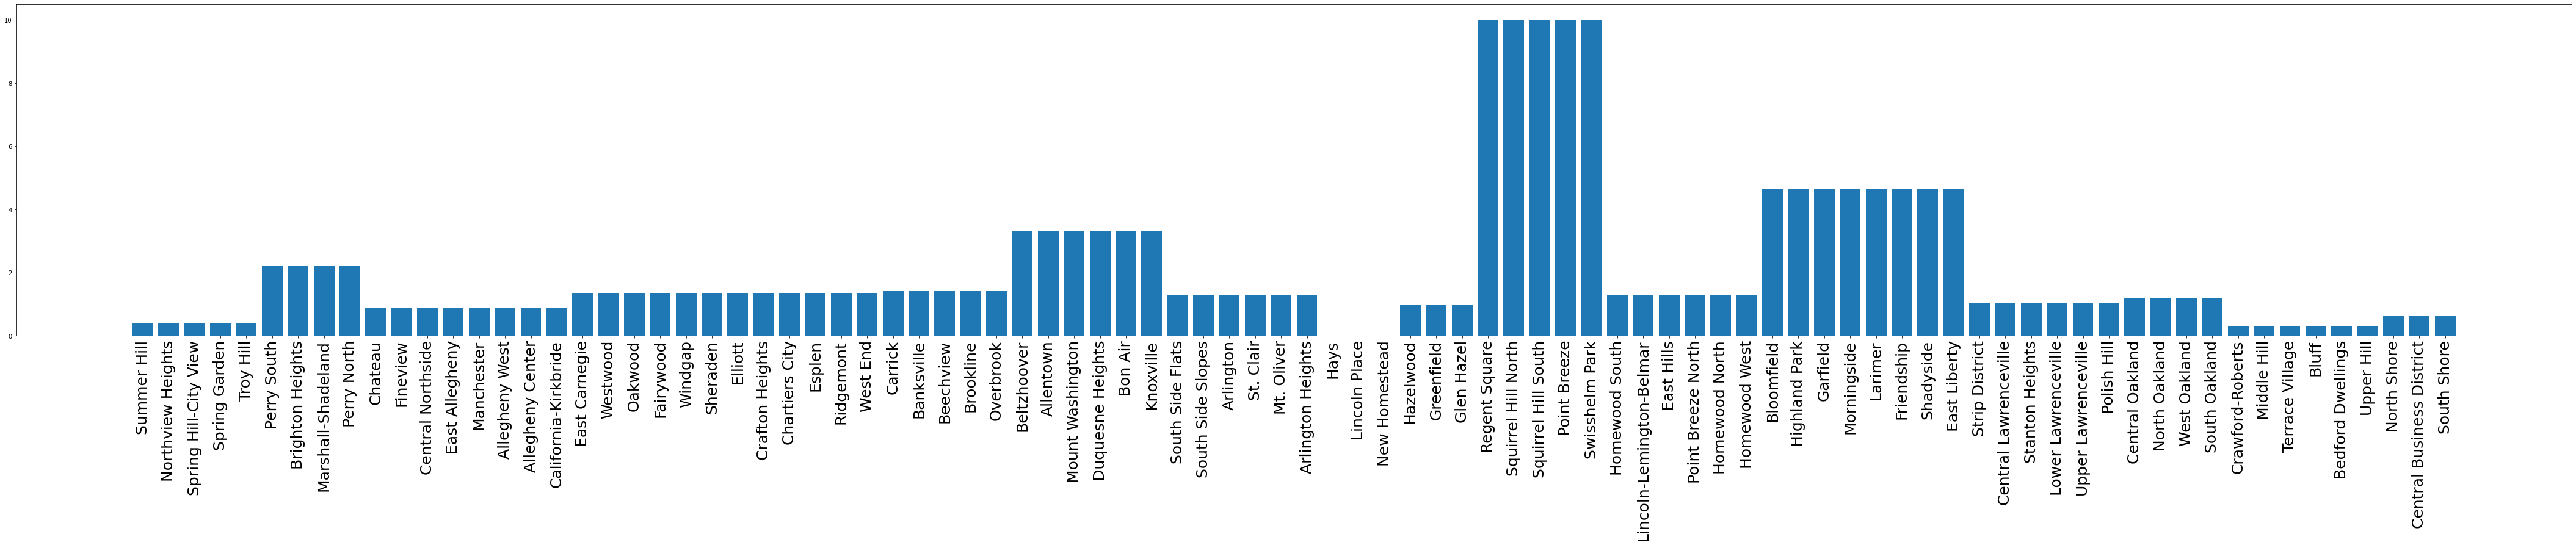

In [38]:
# Normalize values to be between 0 and 10
normalizedValues = allHoods
maxVal = max(allHoods.values())
minVal = min(allHoods.values())
maxVal -= minVal

for neighborhood in normalizedValues:
    normalizedValues[neighborhood] = ((normalizedValues[neighborhood] - minVal) / maxVal) * 10


# Nothing should change here besides the scale
plt.figure(figsize = (75, 10))
plt.xticks(rotation = 90)
plt.xticks(fontsize= 25)
plt.bar(normalizedValues.keys(), normalizedValues.values())
plt.show()
    